In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set grpah style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

In [3]:
file_path = 'US_large_cap_div_dataset.csv'
data = pd.read_csv(file_path)

In [4]:
print("Data preview:")
print(data.head())
print("\nData shape:", data.shape)

Data preview:
   Issue_div  Issued_div_last_year  Net_margin  EBIT_income_growth_yoy  \
0          1                     1    0.558480                1.470369   
1          1                     0    0.163531                0.437837   
2          1                     1    0.359560                0.236210   
3          1                     1    0.488493                6.805871   
4          1                     1    0.239713                0.077996   

   Net_gearing  Capex_to_EBITDA  
0    -0.415243         0.038399  
1    -0.032073         0.055635  
2     0.083095         0.328790  
3    -0.347340         0.030222  
4    -0.660070         0.069127  

Data shape: (158, 6)


In [5]:
y = data.iloc[:, 0]  # dependent variable
X = data.iloc[:, 1:]  # independent variable

In [6]:
X = sm.add_constant(X)

In [7]:
# train logit model
logit_model = sm.Logit(y, X)
result = logit_model.fit(maxiter=100, method='bfgs')

Optimization terminated successfully.
         Current function value: 0.141023
         Iterations: 46
         Function evaluations: 47
         Gradient evaluations: 47


In [8]:
# Print model summary
print("\n" + "="*80)
print("Logit model summary:")
print("="*80)
print(result.summary())


Logit model summary:
                           Logit Regression Results                           
Dep. Variable:              Issue_div   No. Observations:                  158
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            5
Date:                Sun, 01 Jun 2025   Pseudo R-squ.:                  0.7946
Time:                        21:09:44   Log-Likelihood:                -22.282
converged:                       True   LL-Null:                       -108.49
Covariance Type:            nonrobust   LLR p-value:                 2.226e-35
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.2870      1.072     -3.065      0.002      -5.389      -1.185
Issued_div_last_year      14.2677     38.471      0.371      0.711     -6

In [9]:
coef_df = pd.DataFrame({
    'Variable': result.params.index,
    'Coefficient': result.params.values,
    'Std_Error': result.bse.values,
    'z_value': result.tvalues.values,
    'p_value': result.pvalues.values,
})

In [10]:
coef_df['Odds_Ratio'] = np.exp(coef_df['Coefficient'])

In [11]:
coef_df = coef_df.sort_values('p_value')

Text(0, 0.5, 'Variable')

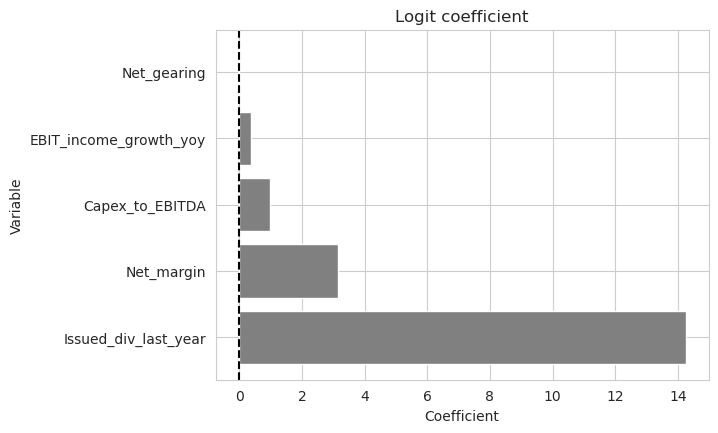

In [12]:
# Visualize result
plt.figure(figsize=(14, 10))

# Significance
plt.subplot(2, 2, 1)
significant_vars = coef_df[coef_df['Variable'] != 'const']
significant_vars = significant_vars.sort_values('Coefficient', ascending=False)
colors = ['gray']
plt.barh(significant_vars['Variable'], significant_vars['Coefficient'], color=colors)
plt.axvline(x=0, color='k', linestyle='--')
plt.title('Logit coefficient')
plt.xlabel('Coefficient')
plt.ylabel('Variable')

In [13]:
file_path_ols = 'US_large_cap_div_dataset_ols.csv'
data_ols = pd.read_csv(file_path_ols)

In [14]:
y_ols = data_ols.iloc[:, 0]  # dependent variable
X_ols = data_ols.iloc[:, 1:]  # independent variable

In [15]:
X_ols = sm.add_constant(X_ols)

In [16]:
# train OLS model
ols_model = sm.OLS(y_ols, X_ols)
result_ols = ols_model.fit(maxiter=100)

In [17]:
# Print model summary
print("\n" + "="*80)
print("OLS model summary:")
print("="*80)
print(result_ols.summary())


OLS model summary:
                            OLS Regression Results                            
Dep. Variable:              Issue_div   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     799.7
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           2.75e-63
Time:                        21:09:44   Log-Likelihood:                 29.555
No. Observations:                 158   AIC:                            -55.11
Df Residuals:                     156   BIC:                            -48.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       